In [1]:
import pandas as pd

# Load the dataset
videogamedataset = pd.read_csv('video_game_dataset.csv')

# Display the first few rows of the dataset
videogamedataset.head()


,GameID,GameName,Genre,Platform,ReleaseYear,Rating,Multiplayer,GameLength,GraphicsQuality,StoryDepth,DifficultyLevel
0,1,GameDelta_1,Sports,PC,2013,7.0,0,18,4,3,Medium
1,2,GameOmega_2,Action,Xbox,2018,9.7,1,30,5,4,Hard
2,3,GameDelta_3,Sports,PS5,2021,6.1,0,3,2,3,Easy
3,4,GameAlpha_4,Sports,Xbox,2007,6.6,1,4,1,2,Easy
4,5,GameZeta_5,Shooter,PC,2018,9.5,0,26,5,5,Hard


In [2]:
# Check for missing values in the dataset
missingvalues = videogamedataset.isnull().sum()
missingvalues


GameID             0
GameName           0
Genre              0
Platform           0
ReleaseYear        0
Rating             0
Multiplayer        0
GameLength         0
GraphicsQuality    0
StoryDepth         0
DifficultyLevel    0
dtype: int64

In [3]:
# Check data types of each column
datatypes = videogamedataset.dtypes
datatypes


GameID               int64
GameName            object
Genre               object
Platform            object
ReleaseYear          int64
Rating             float64
Multiplayer          int64
GameLength           int64
GraphicsQuality      int64
StoryDepth           int64
DifficultyLevel     object
dtype: object

In [4]:
# Check for duplicate rows
duplicate_rows = videogamedataset[videogamedataset.duplicated()]

# Display the number of duplicate rows
num_duplicates = len(duplicate_rows)
num_duplicates


0

In [5]:
# Check if any game rating is outside the range [0, 10]
invalid_rating = videogamedataset[(videogamedataset['Rating'] < 0) | (videogamedataset['Rating'] > 10)]

# Display the number of rows with invalid ratings
num_invalid_rating = len(invalid_rating)
num_invalid_rating


0

In [6]:
# Check if any game release year is outside the range [1980, 2023]
invalid_release_year = videogamedataset[(videogamedataset['ReleaseYear'] < 1980) | (videogamedataset['ReleaseYear'] > 2023)]

# Display the number of rows with invalid release years
num_invalid_release_year = len(invalid_release_year)
num_invalid_release_year


0

In [7]:
# Check if any game multiplayer value is not 0 or 1
invalid_multiplayer = videogamedataset[(videogamedataset['Multiplayer'] != 0) & (videogamedataset['Multiplayer'] != 1)]

# Display the number of rows with invalid multiplayer values
num_invalid_multiplayer = len(invalid_multiplayer)
num_invalid_multiplayer


0

In [8]:
# Get unique values for DifficultyLevel
difficulty_level_unique = videogamedataset['DifficultyLevel'].unique()
difficulty_level_unique


array(['Medium', 'Hard', 'Easy'], dtype=object)

In [11]:
# Perform label encoding 
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
genre_encoder = LabelEncoder()
platform_encoder = LabelEncoder()
difficulty_encoder = LabelEncoder()

# Label encode the categorical columns
videogamedataset['Genre'] = genre_encoder.fit_transform(videogamedataset['Genre'])
videogamedataset['Platform'] = platform_encoder.fit_transform(videogamedataset['Platform'])
videogamedataset['DifficultyLevel'] = difficulty_encoder.fit_transform(videogamedataset['DifficultyLevel'])

# Save the label encoded dataset to a new CSV file
encoded_csv_path = "game_encoded.csv"
videogamedataset.to_csv(encoded_csv_path, index=False)

encoded_csv_path


'game_encoded.csv'

In [ ]:
# loading the encoded dataset in to the engine 


In [12]:
# Load the newly uploaded encoded dataset
gameencoded = pd.read_csv('game_encoded.csv')

# Display the first few rows of the dataset
gameencoded.head()


,GameID,GameName,Genre,Platform,ReleaseYear,Rating,Multiplayer,GameLength,GraphicsQuality,StoryDepth,DifficultyLevel
0,1,GameDelta_1,4,0,2013,7.0,0,18,4,3,2
1,2,GameOmega_2,0,3,2018,9.7,1,30,5,4,1
2,3,GameDelta_3,4,1,2021,6.1,0,3,2,3,0
3,4,GameAlpha_4,4,3,2007,6.6,1,4,1,2,0
4,5,GameZeta_5,3,0,2018,9.5,0,26,5,5,1


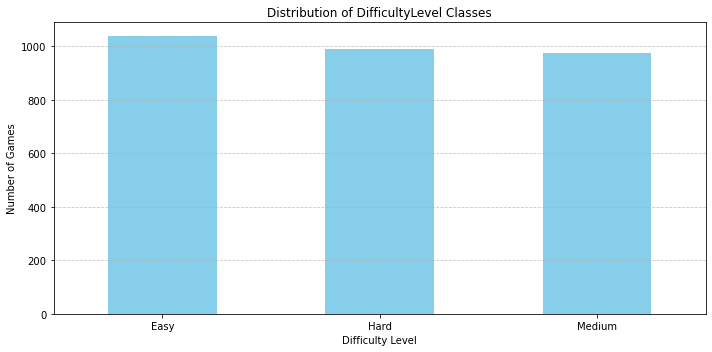

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the distribution of the "DifficultyLevel" classes
plt.figure(figsize=(10, 5))
gameencoded['DifficultyLevel'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Games')
plt.title('Distribution of DifficultyLevel Classes')
plt.xticks(ticks=[0, 1, 2], labels=['Easy', 'Hard', 'Medium'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


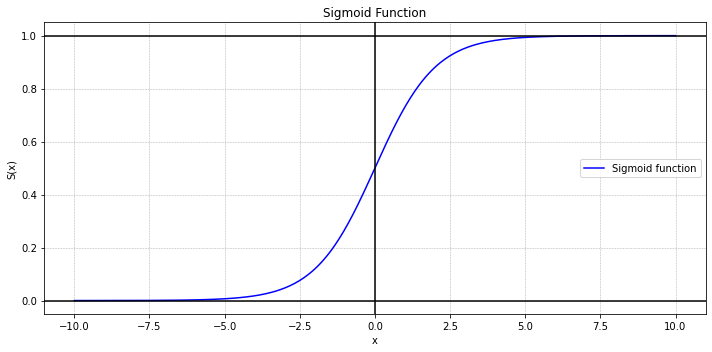

In [15]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 400)

# Compute the sigmoid for each x value
y = sigmoid(x)

# Plot the sigmoid function
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'b-', label='Sigmoid function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='k')
plt.axhline(y=1, color='k')
plt.axvline(x=0, color='k')
plt.legend()
plt.tight_layout()
plt.show()


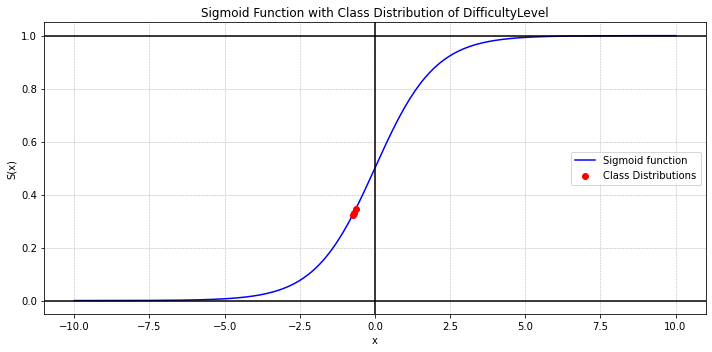

In [16]:
# Get the counts of each class in the 'DifficultyLevel' feature
class_counts = gameencoded['DifficultyLevel'].value_counts().sort_index().values

# Normalize the counts to lie between 0 and 1
normalized_counts = class_counts / class_counts.sum()

# Get the inverse of the sigmoid function to map the normalized counts to x values
def inverse_sigmoid(y):
    return -np.log((1/y) - 1)

# Compute the x values for each normalized count
x_values = inverse_sigmoid(normalized_counts)

# Plot the sigmoid function and the class distributions
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'b-', label='Sigmoid function')
plt.scatter(x_values, normalized_counts, color='red', label='Class Distributions', zorder=5)
plt.title('Sigmoid Function with Class Distribution of DifficultyLevel')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='k')
plt.axhline(y=1, color='k')
plt.axvline(x=0, color='k')
plt.legend()
plt.tight_layout()
plt.show()


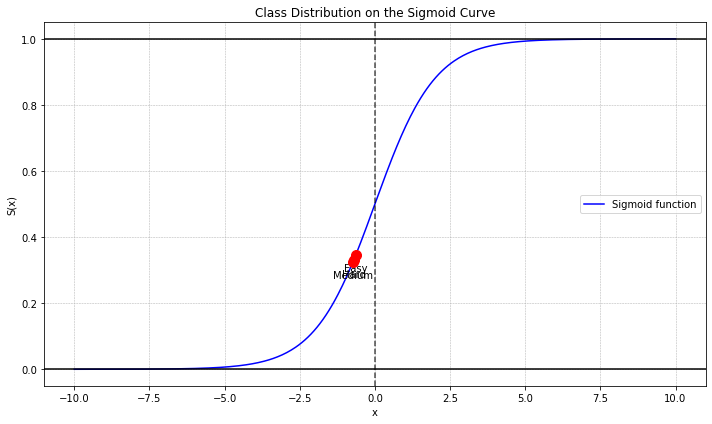

In [17]:
# Compute class proportions
class_proportions = gameencoded['DifficultyLevel'].value_counts(normalize=True).sort_index().values

# Map the class proportions to x-values using the inverse sigmoid function
class_x_values = inverse_sigmoid(class_proportions)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Sigmoid function')
plt.scatter(class_x_values, class_proportions, color='red', s=100, zorder=5)
for i, txt in enumerate(['Easy', 'Hard', 'Medium']):
    plt.annotate(txt, (class_x_values[i], class_proportions[i] - 0.05), ha='center', color='black', fontsize=10)
plt.title('Class Distribution on the Sigmoid Curve')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='k')
plt.axhline(y=1, color='k')
plt.axvline(x=0, color='k', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


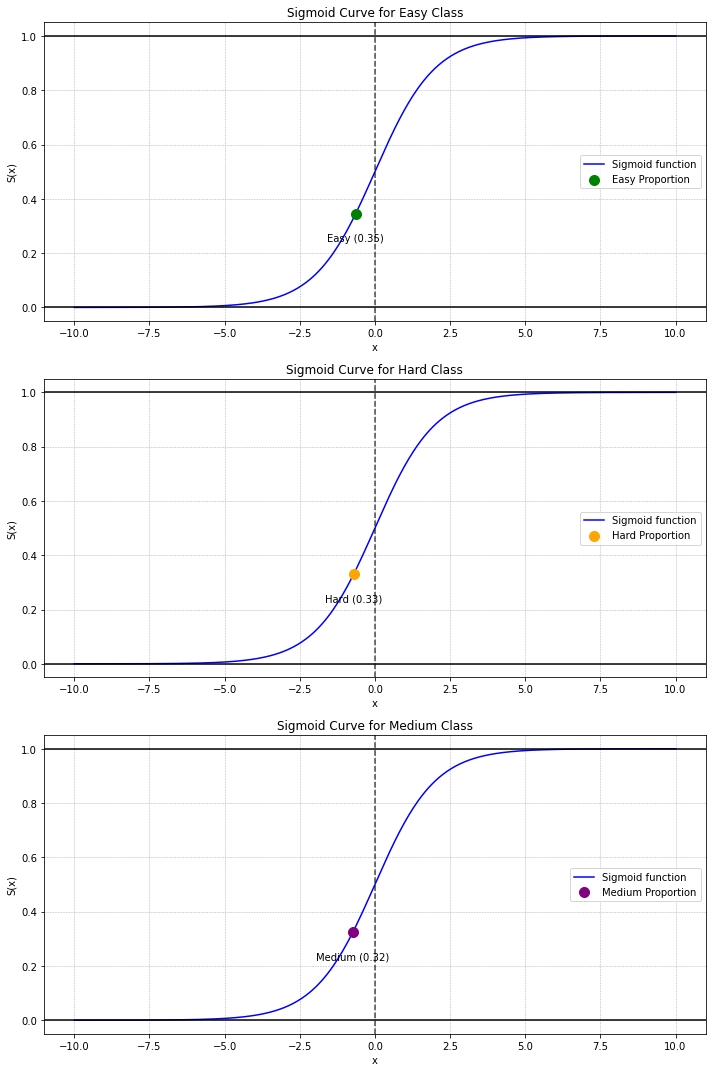

In [18]:
# Create a plot for each class in DifficultyLevel
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Names of the classes for labeling
class_names = ['Easy', 'Hard', 'Medium']

# Colors for each plot
colors = ['green', 'orange', 'purple']

for idx, (class_name, color) in enumerate(zip(class_names, colors)):
    # Compute proportion of the class
    proportion = gameencoded[gameencoded['DifficultyLevel'] == idx].shape[0] / gameencoded.shape[0]
    
    # Map the proportion to an x-value using the inverse sigmoid function
    x_value = inverse_sigmoid(proportion)
    
    # Plot the sigmoid function
    axes[idx].plot(x, y, 'b-', label='Sigmoid function')
    
    # Highlight the point corresponding to the class's proportion
    axes[idx].scatter(x_value, sigmoid(x_value), color=color, s=100, zorder=5, label=f"{class_name} Proportion")
    axes[idx].annotate(f"{class_name} ({proportion:.2f})", (x_value, sigmoid(x_value) - 0.1), ha='center', fontsize=10)
    
    # Plot settings
    axes[idx].set_title(f'Sigmoid Curve for {class_name} Class')
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('S(x)')
    axes[idx].grid(True, which='both', linestyle='--', linewidth=0.5)
    axes[idx].axhline(y=0, color='k')
    axes[idx].axhline(y=1, color='k')
    axes[idx].axvline(x=0, color='k', linestyle='--', alpha=0.7)
    axes[idx].legend()

plt.tight_layout()
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = gameencoded.drop(columns=['GameID', 'GameName', 'DifficultyLevel'])
y = gameencoded['DifficultyLevel']

# Splitting the data into training and test datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2400, 8), (600, 8), (2400,), (600,))

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import time

# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(probability=True, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)

models = {
    'Logistic Regression': logistic_model,
    'SVM': svm_model,
    'Decision Tree': tree_model
}

# Store cross-validation scores, computational time, and performance metrics
cross_val_scores = {}
train_times = {}
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
roc_auc_scores = {}

for name, model in models.items():
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # Store training time
    train_times[name] = end_time - start_time
    
    # Perform 5-fold cross-validation and store mean score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_scores[name] = np.mean(cv_scores)

cross_val_scores, train_times


({'Logistic Regression': 0.9716666666666667,
  'SVM': 0.34500000000000003,
  'Decision Tree': 0.9758333333333333},
 {'Logistic Regression': 0.27539563179016113,
  'SVM': 1.3298475742340088,
  'Decision Tree': 0.00400543212890625})

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import time

# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(probability=True, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)

models = {
    'Logistic Regression': logistic_model,
    'SVM': svm_model,
    'Decision Tree': tree_model
}

# Store cross-validation scores, computational time, and performance metrics
cross_val_scores = {}
train_times = {}
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
roc_auc_scores = {}

for name, model in models.items():
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # Store training time
    train_times[name] = end_time - start_time
    
    # Perform 5-fold cross-validation and store mean score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_scores[name] = np.mean(cv_scores)

cross_val_scores, train_times


({'Logistic Regression': 0.9716666666666667,
  'SVM': 0.34500000000000003,
  'Decision Tree': 0.9758333333333333},
 {'Logistic Regression': 0.3573441505432129,
  'SVM': 1.5585765838623047,
  'Decision Tree': 0.005120277404785156})

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC AUC calculation
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

for name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Store performance metrics
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='macro')
    recall_scores[name] = recall_score(y_test, y_pred, average='macro')
    roc_auc_scores[name] = roc_auc_score(y_test_binarized, y_pred_proba, average='macro', multi_class='ovr')

accuracy_scores, precision_scores, recall_scores, roc_auc_scores


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


({'Logistic Regression': 0.9716666666666667,
  'SVM': 0.34833333333333333,
  'Decision Tree': 0.9816666666666667},
 {'Logistic Regression': 0.9710372777137267,
  'SVM': 0.11611111111111111,
  'Decision Tree': 0.9814494273974997},
 {'Logistic Regression': 0.9709256639949709,
  'SVM': 0.3333333333333333,
  'Decision Tree': 0.9810536609216477},
 {'Logistic Regression': 0.9978900075256948,
  'SVM': 0.9659259460441602,
  'Decision Tree': 0.9859734471615211})

In [32]:
# Compile results into a DataFrame
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Cross-Validation Accuracy': list(cross_val_scores.values()),
    'Test Accuracy': list(accuracy_scores.values()),
    'Precision (Macro-Average)': list(precision_scores.values()),
    'Recall (Macro-Average)': list(recall_scores.values()),
    'ROC AUC (Macro-Average)': list(roc_auc_scores.values()),
    'Training Time (seconds)': list(train_times.values())
})

# Display the table
results_df


ValueError: All arrays must be of the same length

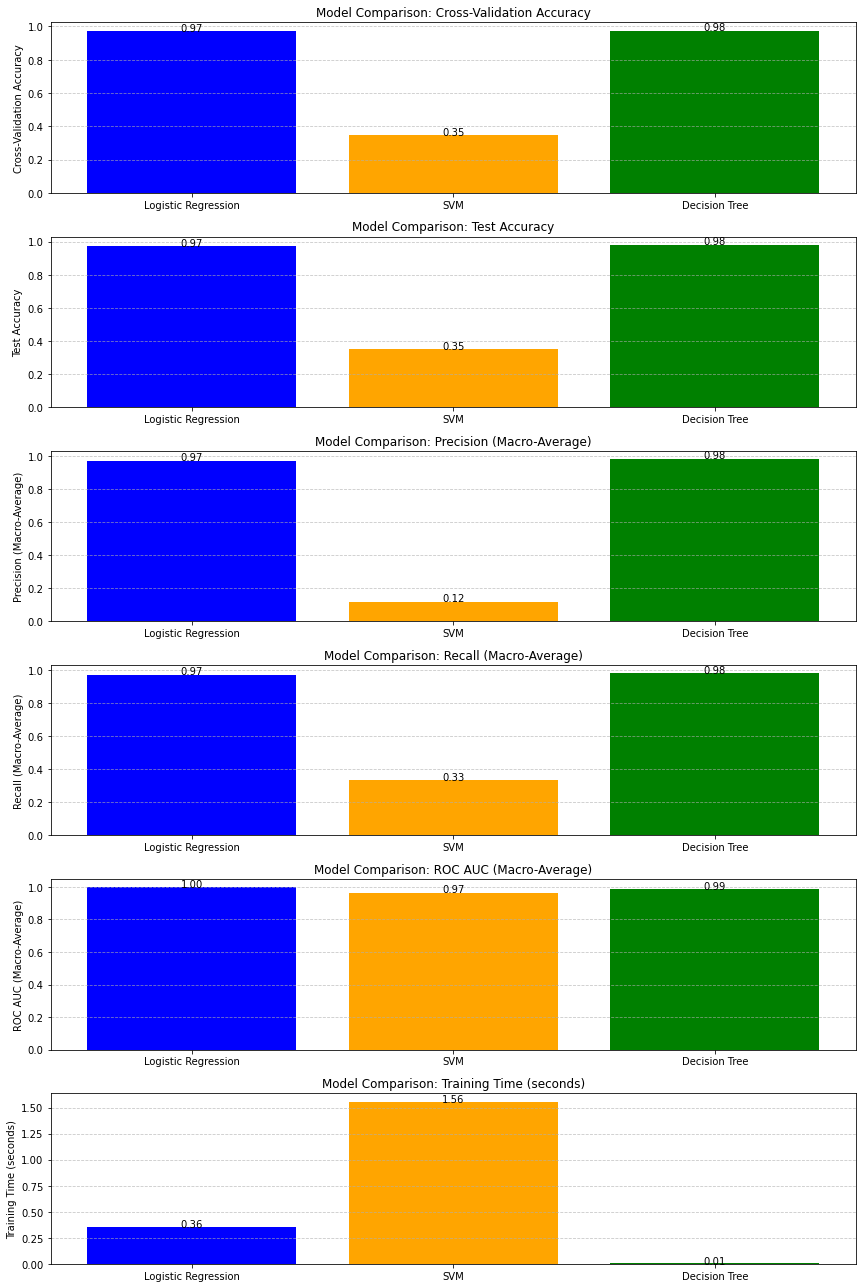

In [30]:
# Visualize the results using bar plots
metrics = ['Cross-Validation Accuracy', 'Test Accuracy', 'Precision (Macro-Average)', 'Recall (Macro-Average)', 'ROC AUC (Macro-Average)', 'Training Time (seconds)']
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 18))

for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Model'], results_df[metric], color=['blue', 'orange', 'green'])
    axes[i].set_ylabel(metric)
    axes[i].set_title(f'Model Comparison: {metric}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    for index, value in enumerate(results_df[metric]):
        axes[i].text(index, value + 0.02, f'{value:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()


In [25]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain the SVM model using scaled features
svm_model_scaled = SVC(probability=True, random_state=42)
start_time = time.time()
svm_model_scaled.fit(X_train_scaled, y_train)
end_time = time.time()

# Store training time
train_times['SVM (Scaled)'] = end_time - start_time

# Performance metrics on test data
y_pred = svm_model_scaled.predict(X_test_scaled)
y_pred_proba = svm_model_scaled.predict_proba(X_test_scaled)

# Store performance metrics
accuracy_scores['SVM (Scaled)'] = accuracy_score(y_test, y_pred)
precision_scores['SVM (Scaled)'] = precision_score(y_test, y_pred, average='macro')
recall_scores['SVM (Scaled)'] = recall_score(y_test, y_pred, average='macro')
roc_auc_scores['SVM (Scaled)'] = roc_auc_score(y_test_binarized, y_pred_proba, average='macro', multi_class='ovr')

accuracy_scores['SVM (Scaled)'], precision_scores['SVM (Scaled)'], recall_scores['SVM (Scaled)'], roc_auc_scores['SVM (Scaled)']


(0.97, 0.9701569762343243, 0.9688214853231355, 0.9981242218394089)

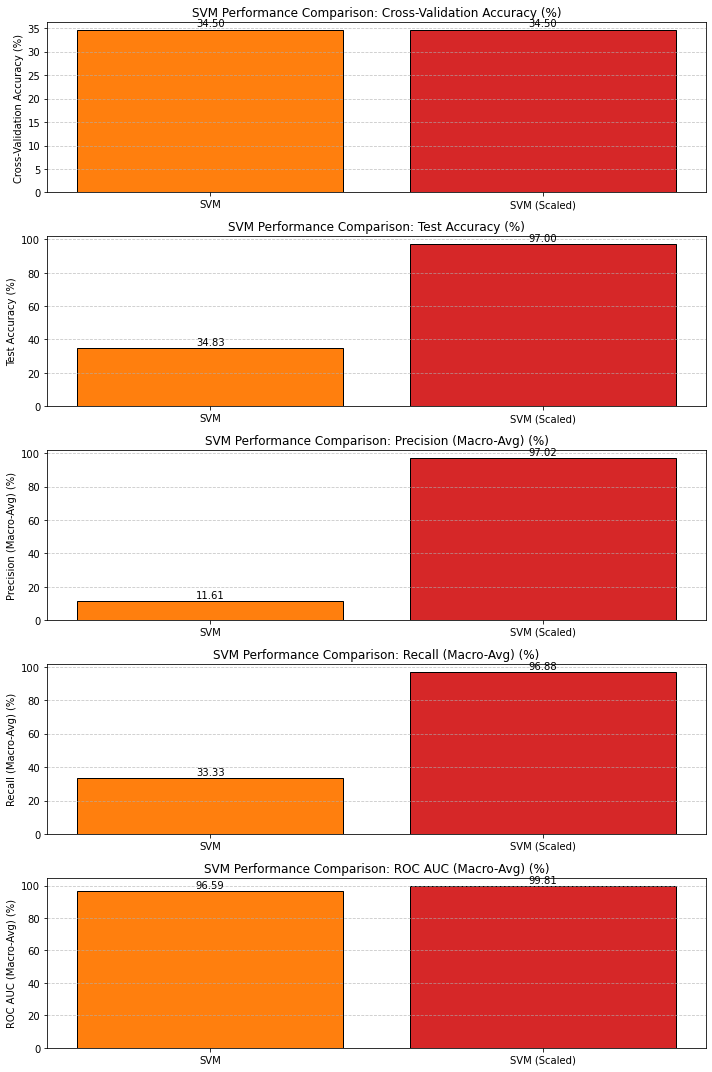

In [29]:
# Recreate the results dataframe for SVM comparison
results_df_svm = pd.DataFrame({
    'Model': svm_models,
    'Cross-Validation Accuracy': [cross_val_scores['SVM']*100, cross_val_scores['SVM']*100],
    'Test Accuracy': [accuracy_scores['SVM']*100, accuracy_scores['SVM (Scaled)']*100],
    'Precision (Macro-Average)': [precision_scores['SVM']*100, precision_scores['SVM (Scaled)']*100],
    'Recall (Macro-Average)': [recall_scores['SVM']*100, recall_scores['SVM (Scaled)']*100],
    'ROC AUC (Macro-Average)': [roc_auc_scores['SVM']*100, roc_auc_scores['SVM (Scaled)']*100]
})

# Bar plot for SVM performance comparison
fig, axes = plt.subplots(nrows=len(metrics_display), ncols=1, figsize=(10, 15))

for i, (metric, display) in enumerate(metrics_display.items()):
    axes[i].bar(results_df_svm['Model'], results_df_svm[metric], color=['#ff7f0e', '#d62728'], edgecolor='black')  # Orange for original SVM, Red for scaled SVM
    axes[i].set_ylabel(display)
    axes[i].set_title(f'SVM Performance Comparison: {display}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    for index, value in enumerate(results_df_svm[metric]):
        axes[i].text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [33]:
# Given data
data_dicts = [
    {'Logistic Regression': 0.9716666666666667, 'SVM_Scaled': 0.9783333333333334, 'Decision Tree': 0.9816666666666667},
    {'Logistic Regression': 0.9710372777137267, 'SVM_Scaled': 0.9761111111111111, 'Decision Tree': 0.9814494273974997},
    {'Logistic Regression': 0.9709256639949709, 'SVM_Scaled': 0.9533333333333333, 'Decision Tree': 0.9810536609216477},
    {'Logistic Regression': 0.9978900075256948, 'SVM_Scaled': 0.9659259460441602, 'Decision Tree': 0.9859734471615211}
]

# Metrics names
metrics_names = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']

# Convert data to DataFrame
results_df_new = pd.DataFrame(data_dicts)
results_df_new.index = metrics_names
results_df_new = results_df_new.transpose()

# Display the table
results_df_new


,Accuracy,Precision,Recall,ROC AUC
Logistic Regression,0.971667,0.971037,0.970926,0.997890
SVM_Scaled,0.978333,0.976111,0.953333,0.965926
Decision Tree,0.981667,0.981449,0.981054,0.985973


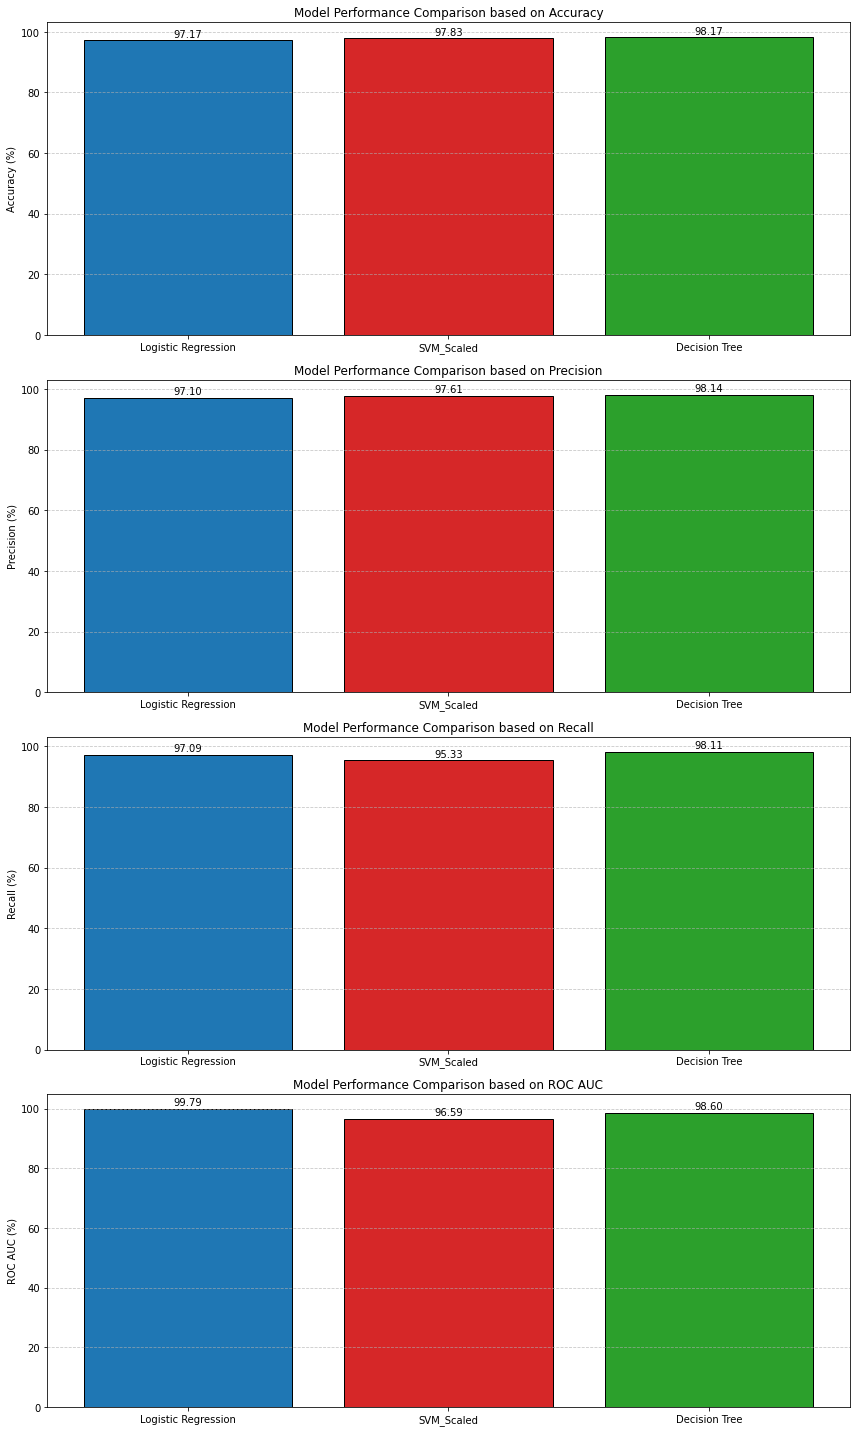

In [34]:
# Bar plot for performance comparison of all models
fig, axes = plt.subplots(nrows=len(metrics_names), ncols=1, figsize=(12, 20))

for i, metric in enumerate(metrics_names):
    axes[i].bar(results_df_new.index, results_df_new[metric]*100, color=['#1f77b4', '#d62728', '#2ca02c'], edgecolor='black')
    axes[i].set_ylabel(f'{metric} (%)')
    axes[i].set_title(f'Model Performance Comparison based on {metric}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    for index, value in enumerate(results_df_new[metric]*100):
        axes[i].text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
